In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
#sns.palplot(sns.color_palette("husl", 8))
import scipy
import matplotlib.dates as mdates

In [2]:
path='/Users/stella/Desktop/'
date_0=datetime.date(2017,4,14)
date_1=datetime.date(2017,7,1)

In [3]:
# PEGASOR INDOOR AND OUTDOOR DATA
i_ldsa=pd.read_excel(path+'realeco_sn0135-ldsa_2017-01-23t181000_2017-07-01t181000.xlsx')
i_ldsa=i_ldsa.set_index('time')
i_pn=pd.read_excel(path+'realeco_sn0135-pm25_2017-01-19t181600_2017-07-01t181600.xlsx')
i_pn=i_pn.set_index('time')
i_pm25=pd.read_excel(path+'realeco_sn0135-pn_2017-01-25t183900_2017-07-01t183900.xlsx')
i_pm25=i_pm25.set_index('time')

i_df=(i_ldsa.join(i_pn)).join(i_pm25).dropna()
i_df.columns=['i-ldsa','i-pm25','i-pn']

i_df=i_df.reset_index()
i_df['time']=i_df['time']-datetime.timedelta(hours=1)
i_df=i_df.set_index('time')

In [4]:
urban=pd.read_csv(path+'1329_PEGASOR A_20170712185105-2.csv',delimiter=',')
urban['DateTime']=urban['DateTime'].apply(lambda x: parse(x))
urban.columns=['time','ldsa-1','pn-1','pm25-1','ldsa-2','pn-2','pm25-2']
urban['pn-1'].loc[:80034]=urban['pn-1'].loc[:80034]*6
urban['pn-2'].loc[:80033]=urban['pn-2'].loc[:80033]*6
urban=urban.set_index('time')

pegasor=i_df.join(urban).reset_index()

pegasor=pegasor[(pegasor['time']>date_0) & (pegasor['time']<date_1)]
pegasor=pegasor[pegasor>0].dropna().reset_index()
del pegasor['index']
#del pegasor['level_0']

/Users/stella/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
pegasor.head()

,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
0,2017-04-14 00:01:00,4.641469,1.120148,544.170,22.006,125985.840,0.864,21.477,124777.199,0.856
1,2017-04-14 00:02:00,4.611528,1.096642,544.913,22.006,125985.840,0.864,21.477,124777.199,0.856
2,2017-04-14 00:03:00,4.587516,1.085626,543.502,22.006,125985.840,0.864,21.520,124830.368,0.856
3,2017-04-14 00:04:00,4.565944,1.110844,532.963,21.834,125202.347,0.859,21.520,124830.368,0.856
4,2017-04-14 00:05:00,4.580138,1.125090,531.832,21.834,125202.347,0.859,20.943,121472.961,0.833


In [6]:
#april         3783
apr_3783=pd.read_excel(path+'queens-data/Queens Data Logger TSI 3783 Ultrafine February to April.xls')[1:-8]
apr_3783['Date&Time']=apr_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

#may-june      3783
may_jun_3783=pd.read_csv(path+'queens-data/TEOM_TSI 3783_May-June_2017.csv')[:-8]
may_jun_3783 = may_jun_3783.rename(columns=may_jun_3783.iloc[1])
may_jun_3783 = may_jun_3783[3:]
may_jun_3783=may_jun_3783[['Date&Time','UF Aggregated Conc.']]
may_jun_3783['Date&Time']=may_jun_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

tsi_3783=pd.concat([apr_3783,may_jun_3783])

tsi_3783['UF Aggregated Conc.']=pd.to_numeric(tsi_3783['UF Aggregated Conc.'], errors='coerce')
tsi_3783=tsi_3783[(tsi_3783['Date&Time']>date_0) & (tsi_3783['Date&Time']<date_1)]
tsi_3783=tsi_3783.reset_index()
del tsi_3783['index']

tsi_3783.columns=['time','TNC (#/cm3)']

In [7]:
#april         3031
apr_3031=pd.read_csv(path+'queens-data/TSI 3031 Particle Counter_20170413-april.TXT',delimiter='\t',skiprows=4)
apr_3031=apr_3031.reset_index()
apr_3031.columns=apr_3031.iloc[0]
apr_3031=apr_3031.iloc[1:].reset_index()
apr_3031['start']=apr_3031['start'].apply(lambda x: parse(x))
apr_3031['end']=apr_3031['end'].apply(lambda x: parse(x))
apr_3031=apr_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

#may-june      3031
may_jun_3031=pd.read_csv(path+'queens-data/TSI 3031_20170501.TXT',delimiter='\t',skiprows=4)
may_jun_3031=may_jun_3031.reset_index()
may_jun_3031.columns=may_jun_3031.iloc[0]
may_jun_3031=may_jun_3031.iloc[1:].reset_index()
may_jun_3031['start']=may_jun_3031['start'].apply(lambda x: parse(x))
may_jun_3031['end']=may_jun_3031['end'].apply(lambda x: parse(x))
may_jun_3031=may_jun_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

tsi_3031=pd.concat([apr_3031,may_jun_3031])

tsi_3031=tsi_3031[(tsi_3031['start']>date_0) & (tsi_3031['start']<date_1)]
tsi_3031[['ch1','ch2','ch3','ch4','ch5','ch6']] = tsi_3031[['ch1','ch2','ch3','ch4','ch5','ch6']].apply(pd.to_numeric)
tsi_3031=tsi_3031[tsi_3031.ch1>0]
tsi_3031=tsi_3031.reset_index()
del tsi_3031['index']

In [8]:
pegasor['ldsa-1/2']=pegasor['ldsa-1']/pegasor['ldsa-2']
pegasor['ldsa-2/1']=pegasor['ldsa-2']/pegasor['ldsa-1']

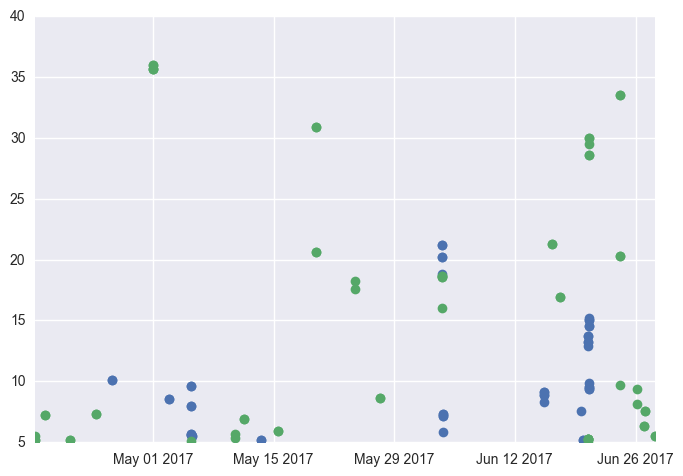

In [9]:
plt.plot(pegasor['time'][pegasor['ldsa-1/2']>5],pegasor['ldsa-1/2'][pegasor['ldsa-1/2']>5],'o')
plt.plot(pegasor['time'][pegasor['ldsa-2/1']>5],pegasor['ldsa-2/1'][pegasor['ldsa-2/1']>5],'o')

In [10]:
pegasor=pegasor[pegasor['ldsa-2/1']<5]
pegasor=pegasor[pegasor['ldsa-1/2']<5].reset_index()
del pegasor['index'], pegasor['ldsa-1/2'], pegasor['ldsa-2/1']

In [11]:
# JUNE 12
ipeg_june=pegasor[(pegasor['time']>=datetime.datetime(2017,6,12,6,30)) & (pegasor['time']<=datetime.datetime(2017,6,12,17))].reset_index()
del ipeg_june ['index']

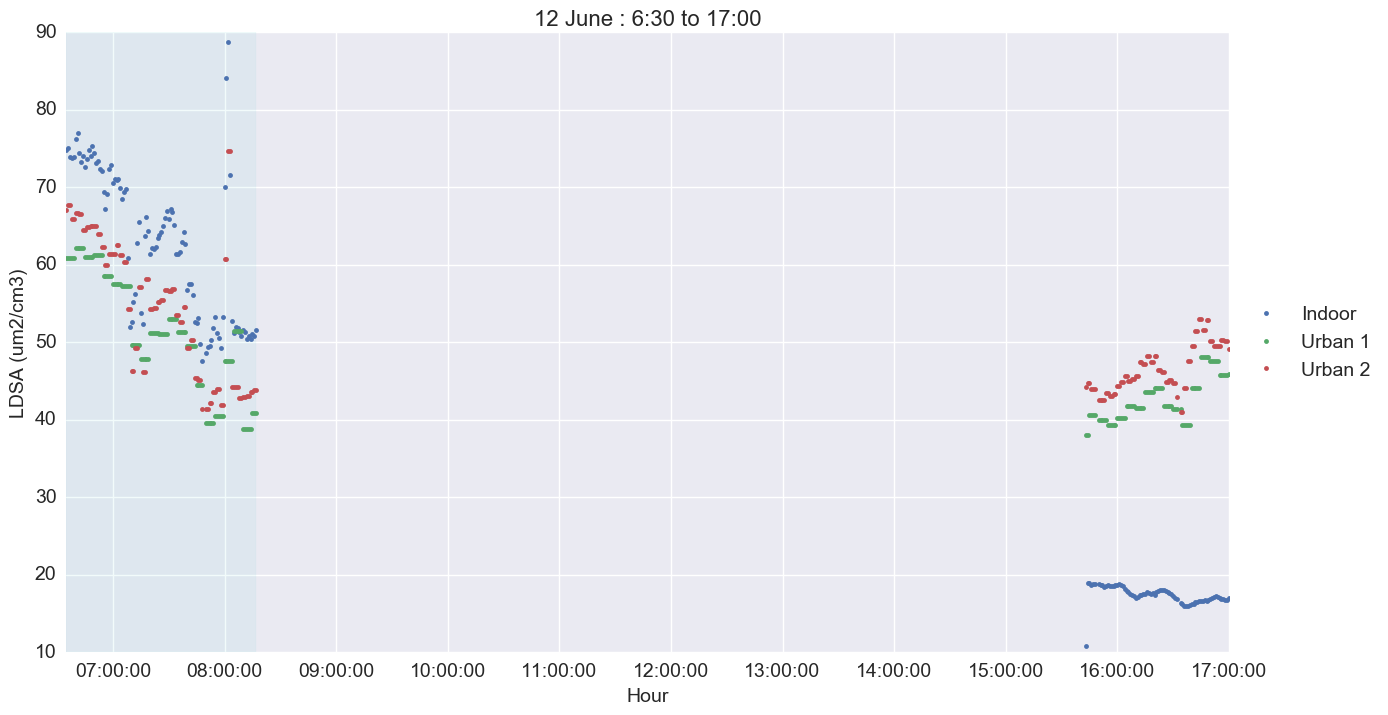

In [16]:
plt.figure(figsize=(15,8))
plt.plot(ipeg_june['time'],ipeg_june['i-ldsa'],'.',label='Indoor')
plt.plot(ipeg_june['time'],ipeg_june['ldsa-1'],'.',label='Urban 1')
plt.plot(ipeg_june['time'],ipeg_june['ldsa-2'],'.',label='Urban 2')
plt.title('12 June : 6:30 to 17:00',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('LDSA (um2/cm3)',fontsize=14)
plt.xlabel('Hour',fontsize=14)

plt.legend(fontsize=14)
plt.axvspan(*mdates.datestr2num(['06/12/2017 6:35','06/12/2017 8:17']), color='c', alpha=0.05)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

In [25]:
jun=ipeg_june[:102]

In [26]:
jun.head()

,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
0,2017-06-12 06:35:00,74.822617,32.479145,6394.357,60.892,349440.674,2.396,67.077,389225.739,2.669
1,2017-06-12 06:36:00,75.028244,32.229321,6448.059,60.892,349440.674,2.396,67.706,392915.771,2.694
2,2017-06-12 06:37:00,73.966461,31.306789,6407.632,60.892,349440.674,2.396,67.706,392915.771,2.694
3,2017-06-12 06:38:00,73.725906,31.851858,6317.055,60.892,349440.674,2.396,65.971,382287.689,2.621
4,2017-06-12 06:39:00,73.911163,33.488132,6172.625,60.892,349440.674,2.396,65.971,382287.689,2.621


In [27]:
jun.tail()

,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
97,2017-06-12 08:13:00,50.804119,32.488697,3524.148,38.800,221383.728,1.518,43.107,249836.960,1.713
98,2017-06-12 08:14:00,50.490532,32.858604,3469.605,38.800,221383.728,1.518,43.540,252388.428,1.731
99,2017-06-12 08:15:00,51.070957,34.022778,3465.522,40.932,233800.781,1.603,43.540,252388.428,1.731
100,2017-06-12 08:16:00,50.775734,34.639549,3401.692,40.932,233800.781,1.603,43.825,253928.711,1.741
101,2017-06-12 08:17:00,51.631752,35.568340,3440.876,40.932,233800.781,1.603,43.825,253928.711,1.741


In [39]:
len(jun)      #check

102

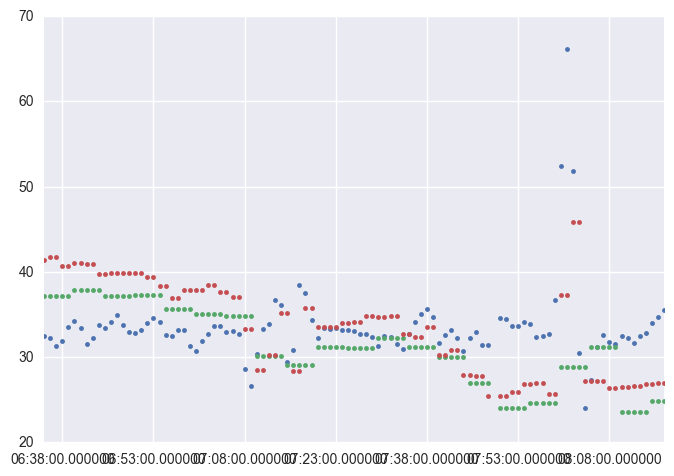

In [37]:
plt.plot(jun['time'],jun['i-pm25'],'.')
plt.plot(jun['time'],jun['pm25-1']*15.5,'.')
plt.plot(jun['time'],jun['pm25-2']*15.5,'.')

In [34]:
jun['i-pm25'].mean()/jun['pm25-2'].mean()

15.507052091322043

In [42]:
teom2=pd.read_csv(path+'TEOM_TSI 3783_May-June_2017.csv')[:-9]
teom2=teom2[1:]
teom2=teom2[['﻿Date&Time','PM2.5_FEM_MC','Status']]
teom2['﻿Date&Time']=teom2['﻿Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))
teom2['PM2.5_FEM_MC']=pd.to_numeric(teom2['PM2.5_FEM_MC'], errors='coerce')
#teom2=teom2[teom2['PM2.5_FEM_MC']>0]
teom2=teom2.reset_index()
del teom2['index'], teom2['Status']
teom2=teom2.rename(columns={'﻿Date&Time':'date'})

In [128]:
teom

NameError: name 'teom' is not defined

In [67]:
teom2=teom2[(teom2['date']>=jun['time'][0]) & (teom2['date']<=jun['time'].iloc[-1])]

In [75]:
jun_pm_ldsa=teom2.set_index('date').join(jun.set_index('time')).dropna()

In [77]:
tsi_3783=tsi_3783[(tsi_3783['time']>=jun['time'][0]) & (tsi_3783['time']<=jun['time'].iloc[-1])]

In [87]:
jun_pm_pn_ldsa=jun_pm_ldsa.join(tsi_3783.set_index('time')).dropna().reset_index()
#del jun_pm_pn_ldsa['index']

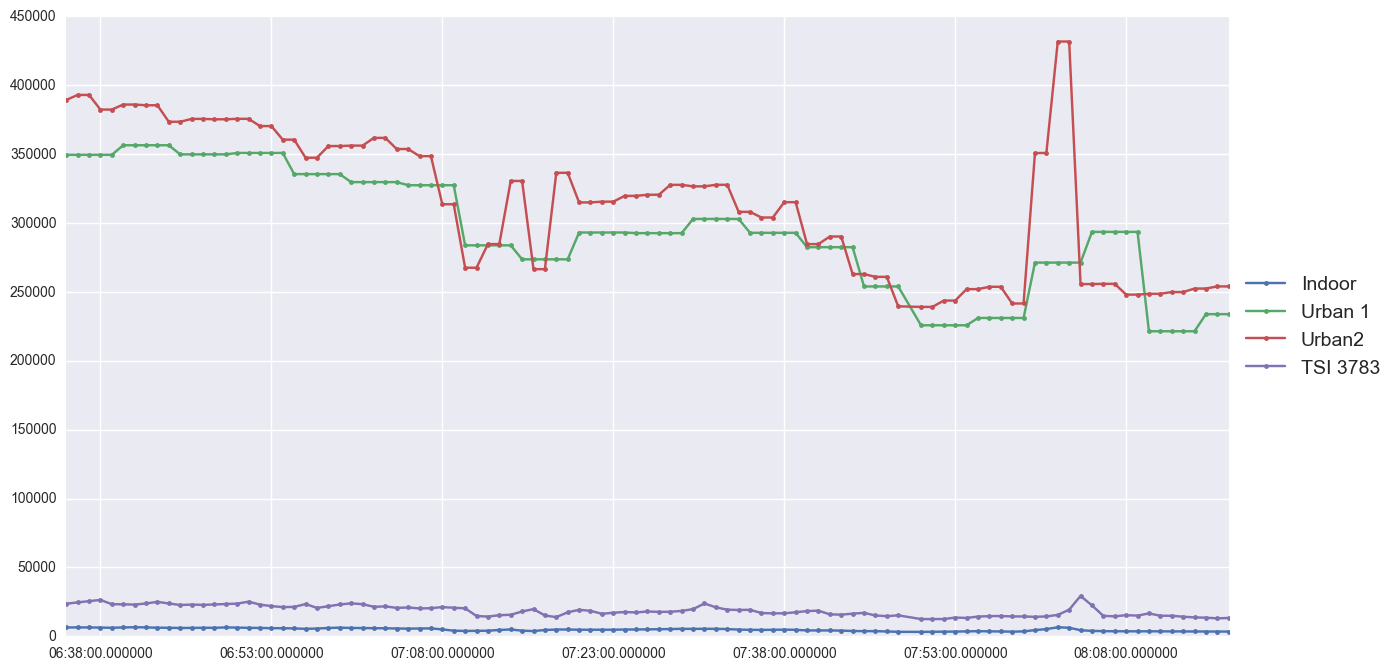

In [122]:
plt.figure(figsize=(15,8))
plt.plot(jun_pm_pn_ldsa['date'],jun_pm_pn_ldsa['i-pn'],'.-',label='Indoor')
plt.plot(jun_pm_pn_ldsa['date'],jun_pm_pn_ldsa['pn-1'],'.-',label='Urban 1')
plt.plot(jun_pm_pn_ldsa['date'],jun_pm_pn_ldsa['pn-2'],'.-',label='Urban2')
plt.plot(jun_pm_pn_ldsa['date'],jun_pm_pn_ldsa['TNC (#/cm3)'],'.-',label='TSI 3783')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

In [136]:
jun_pm_pn_ldsa = jun_pm_pn_ldsa.rename(columns={'PM2.5_FEM_MC':'TEOM PM2.5 (ug/m3)'})

In [138]:
jun_pm_pn_ldsa.head()

,date,TEOM PM2.5 (ug/m3),i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,TNC (#/cm3)
0,2017-06-12 06:35:00,13.51,74.822617,32.479145,6394.357,60.892,349440.674,2.396,67.077,389225.739,2.669,23600.0
1,2017-06-12 06:36:00,13.51,75.028244,32.229321,6448.059,60.892,349440.674,2.396,67.706,392915.771,2.694,24600.0
2,2017-06-12 06:37:00,13.34,73.966461,31.306789,6407.632,60.892,349440.674,2.396,67.706,392915.771,2.694,25500.0
3,2017-06-12 06:38:00,12.84,73.725906,31.851858,6317.055,60.892,349440.674,2.396,65.971,382287.689,2.621,26400.0
4,2017-06-12 06:39:00,12.84,73.911163,33.488132,6172.625,60.892,349440.674,2.396,65.971,382287.689,2.621,23300.0


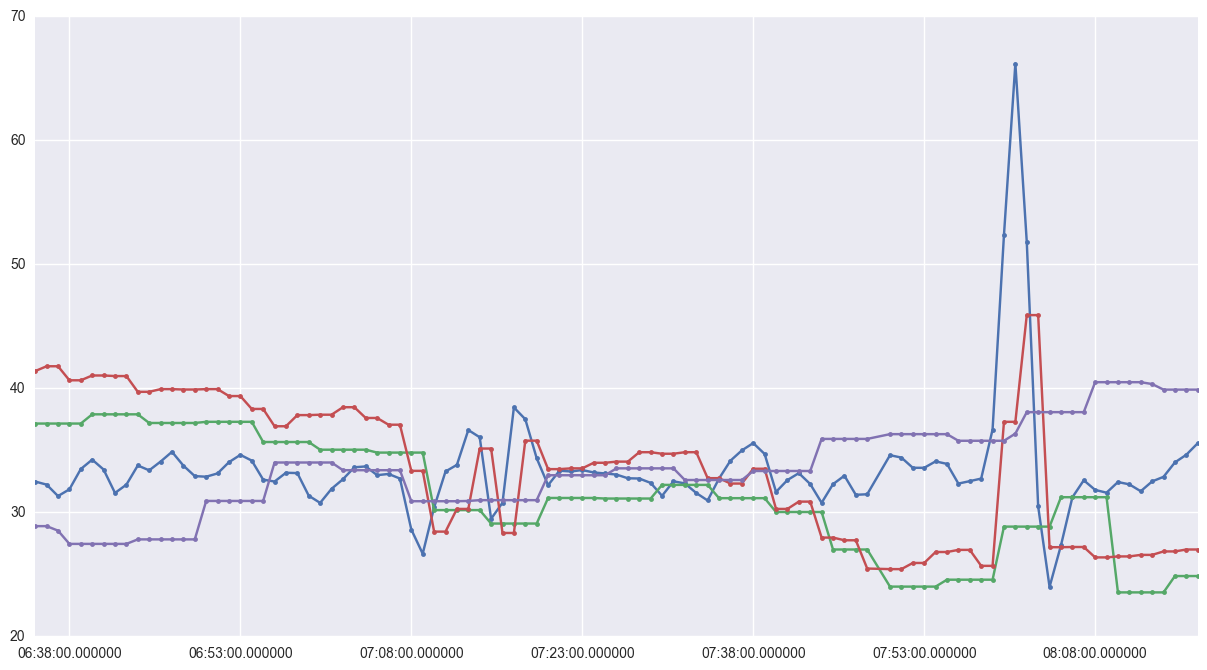

In [169]:
plt.figure(figsize=(15,8))
plt.plot(jun_pm_pn_ldsa['date'],jun_pm_pn_ldsa['i-pm25'],'.-',label='Indoor')
plt.plot(jun_pm_pn_ldsa['date'],jun_pm_pn_ldsa['pm25-1']*factor_urban,'.-',label='Urban 1')
plt.plot(jun_pm_pn_ldsa['date'],jun_pm_pn_ldsa['pm25-2']*factor_urban,'.-',label='Urban 2')
plt.plot(jun_pm_pn_ldsa['date'],jun_pm_pn_ldsa['TEOM PM2.5 (ug/m3)']*factor_teom,'.-',label='TEOM')

In [162]:
factor_teom=jun_pm_pn_ldsa['i-pm25'].mean()/jun_pm_pn_ldsa['TEOM PM2.5 (ug/m3)'].mean()
factor_urban=jun_pm_pn_ldsa['i-pm25'].mean()/jun_pm_pn_ldsa['pm25-2'].mean()

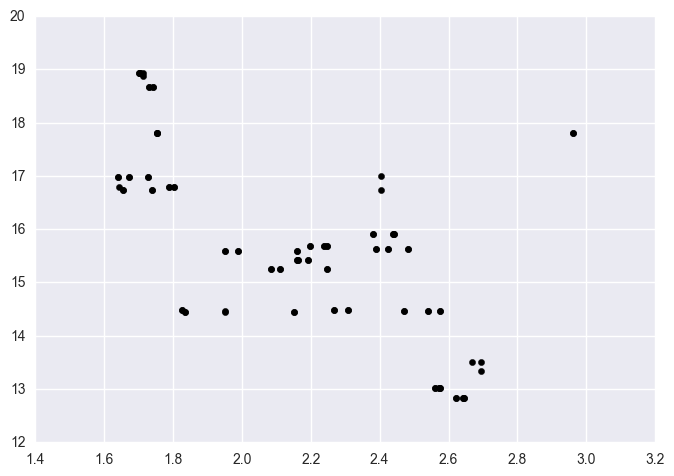

In [156]:
#plt.scatter(jun_pm_pn_ldsa['i-pm25'],jun_pm_pn_ldsa['TEOM PM2.5 (ug/m3)'])
#plt.scatter(jun_pm_pn_ldsa['i-pm25'],jun_pm_pn_ldsa['pm25-1'],color='red')
#plt.scatter(jun_pm_pn_ldsa['i-pm25'],jun_pm_pn_ldsa['pm25-2'],color='green')
plt.scatter(jun_pm_pn_ldsa['pm25-2'],jun_pm_pn_ldsa['TEOM PM2.5 (ug/m3)'],color='k')

In [170]:
jun=jun_pm_pn_ldsa.copy(False)

(3000, 7000)

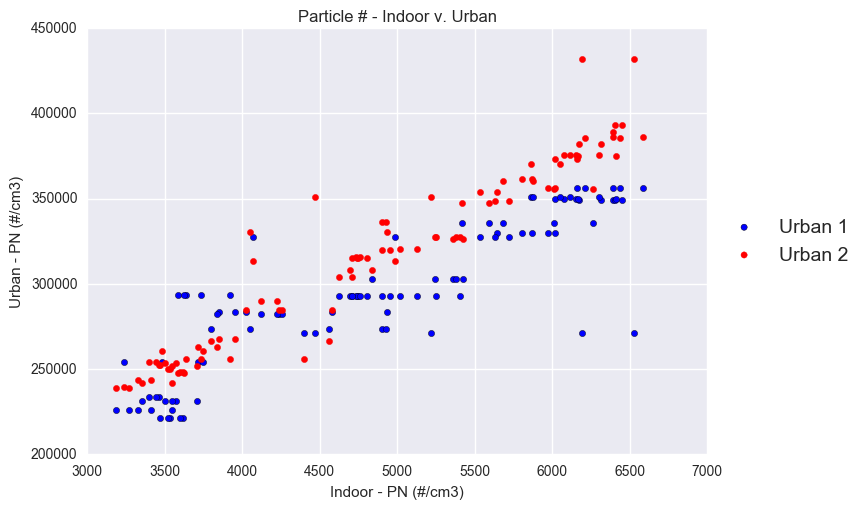

In [204]:
plt.title('Particle # - Indoor v. Urban')
plt.scatter(jun['i-pn'],jun['pn-1'],label='Urban 1')
plt.scatter(jun['i-pn'],jun['pn-2'],color='r',label='Urban 2')
#plt.scatter(jun_pm_pn_ldsa['i-pn'],jun_pm_pn_ldsa[''],color='')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlabel('Indoor - PN (#/cm3)')
plt.ylabel('Urban - PN (#/cm3)')
plt.xlim([3000,7000])

(10000, 30000)

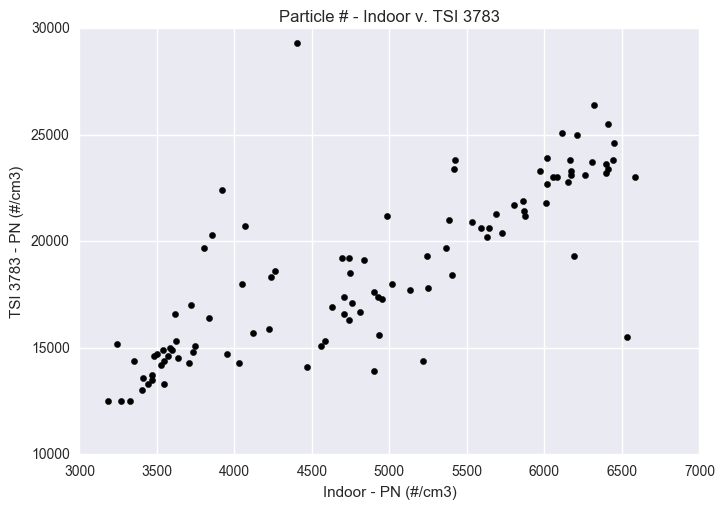

In [205]:
plt.scatter(jun['i-pn'],jun['TNC (#/cm3)'],color='k')
plt.title('Particle # - Indoor v. TSI 3783')
plt.xlabel('Indoor - PN (#/cm3)')
plt.ylabel('TSI 3783 - PN (#/cm3)')
#plt.scatter(jun['i-pn'],jun['pn-2'],color='b',label='indoor v. urban 2')
#plt.scatter(jun_pm_pn_ldsa['i-pn'],jun_pm_pn_ldsa[''],color='')
plt.ylim([10000,30000])

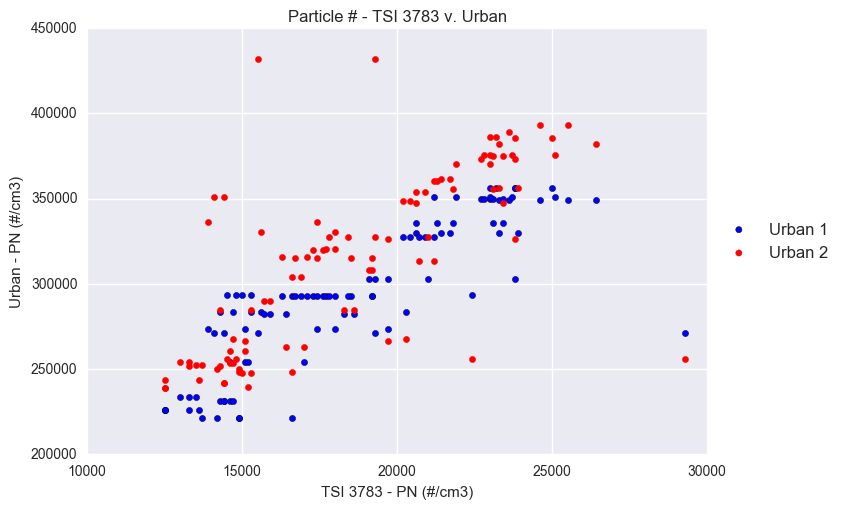

In [214]:
plt.title('Particle # - TSI 3783 v. Urban')
plt.scatter(jun['TNC (#/cm3)'],jun['pn-1'],label='Urban 1')
plt.scatter(jun['TNC (#/cm3)'],jun['pn-2'],color='r',label='Urban 2')
#plt.scatter(jun_pm_pn_ldsa['i-pn'],jun_pm_pn_ldsa[''],color='')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlim([10000, 30000])
plt.xlabel('TSI 3783 - PN (#/cm3)')
plt.ylabel('Urban - PN (#/cm3)')

In [208]:
jun_pn=jun[['i-pn','pn-1','pn-2','TNC (#/cm3)']]

In [210]:
pd.DataFrame.corr(jun_pn)

,i-pn,pn-1,pn-2,TNC (#/cm3)
i-pn,1.000000,0.876163,0.962931,0.801583
pn-1,0.876163,1.000000,0.821394,0.842545
pn-2,0.962931,0.821394,1.000000,0.715239
TNC (#/cm3),0.801583,0.842545,0.715239,1.000000


In [212]:
jun_pm=jun[['i-pm25','pm25-1','pm25-2','TEOM PM2.5 (ug/m3)']]

In [213]:
pd.DataFrame.corr(jun_pm)

,i-pm25,pm25-1,pm25-2,TEOM PM2.5 (ug/m3)
i-pm25,1.000000,-0.116525,0.184877,0.070486
pm25-1,-0.116525,1.000000,0.821331,-0.761476
pm25-2,0.184877,0.821331,1.000000,-0.669283
TEOM PM2.5 (ug/m3),0.070486,-0.761476,-0.669283,1.000000


In [216]:
jun_pn_ldsa=jun[['i-pn','pn-1','pn-2','TNC (#/cm3)','i-ldsa','ldsa-1','ldsa-2']]

In [217]:
pd.DataFrame.corr(jun_pn_ldsa)

,i-pn,pn-1,pn-2,TNC (#/cm3),i-ldsa,ldsa-1,ldsa-2
i-pn,1.000000,0.876163,0.962931,0.801583,0.958679,0.875083,0.962581
pn-1,0.876163,1.000000,0.821394,0.842545,0.785336,0.999939,0.820766
pn-2,0.962931,0.821394,1.000000,0.715239,0.950585,0.820706,0.999935
TNC (#/cm3),0.801583,0.842545,0.715239,1.000000,0.653579,0.841777,0.714147
i-ldsa,0.958679,0.785336,0.950585,0.653579,1.000000,0.784994,0.950890
ldsa-1,0.875083,0.999939,0.820706,0.841777,0.784994,1.000000,0.820148
ldsa-2,0.962581,0.820766,0.999935,0.714147,0.950890,0.820148,1.000000


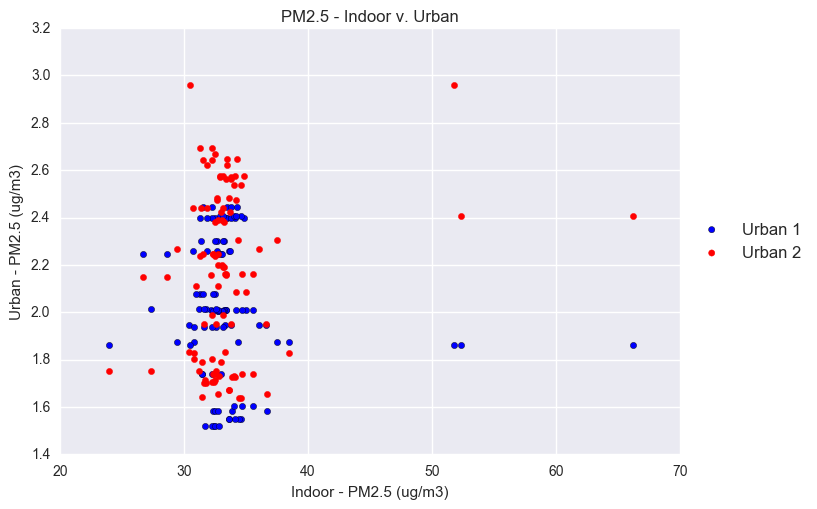

In [223]:
plt.title('PM2.5 - Indoor v. Urban')
plt.scatter(jun['i-pm25'],jun['pm25-1'],label='Urban 1')
plt.scatter(jun['i-pm25'],jun['pm25-2'],color='r',label='Urban 2')
#plt.scatter(jun_pm_pn_ldsa['i-pn'],jun_pm_pn_ldsa[''],color='')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
#plt.xlim([10000, 30000])
plt.xlabel('Indoor - PM2.5 (ug/m3)')
plt.ylabel('Urban - PM2.5 (ug/m3)')

(1.5, 3.0)

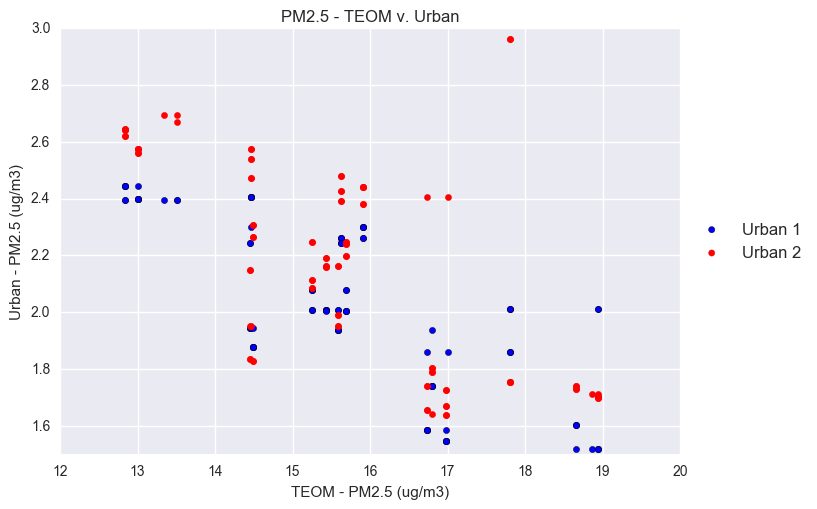

In [229]:
plt.title('PM2.5 - TEOM v. Urban')
plt.scatter(jun['TEOM PM2.5 (ug/m3)'],jun['pm25-1'],label='Urban 1')
plt.scatter(jun['TEOM PM2.5 (ug/m3)'],jun['pm25-2'],color='r',label='Urban 2')
#plt.scatter(jun_pm_pn_ldsa['i-pn'],jun_pm_pn_ldsa[''],color='')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
#plt.xlim([10000, 30000])
plt.xlabel('TEOM - PM2.5 (ug/m3)')
plt.ylabel('Urban - PM2.5 (ug/m3)')
plt.ylim([1.5,3.0])

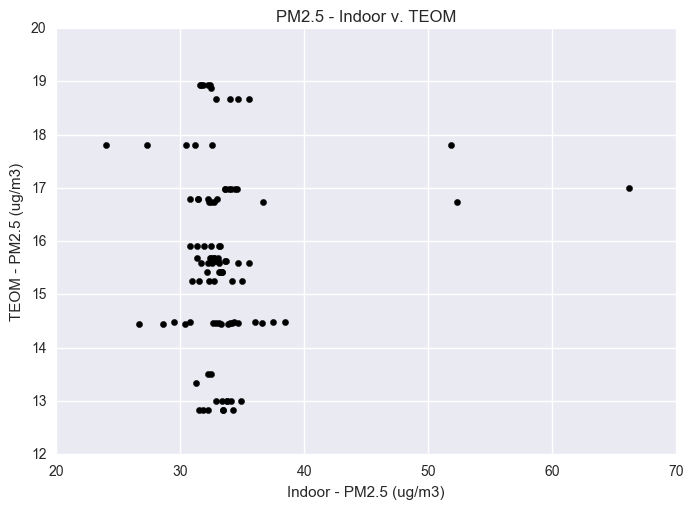

In [236]:
plt.title('PM2.5 - Indoor v. TEOM')
plt.scatter(jun['i-pm25'],jun['TEOM PM2.5 (ug/m3)'],color='k')
#plt.scatter(jun_pm_pn_ldsa['i-pn'],jun_pm_pn_ldsa[''],color='')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
#plt.xlim([10000, 30000])
plt.xlabel('Indoor - PM2.5 (ug/m3)')
plt.ylabel('TEOM - PM2.5 (ug/m3)')
#plt.ylim([1.5,3.0])

In [237]:
jun.tail()

,date,TEOM PM2.5 (ug/m3),i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,TNC (#/cm3)
97,2017-06-12 08:13:00,18.87,50.804119,32.488697,3524.148,38.800,221383.728,1.518,43.107,249836.960,1.713,14200.0
98,2017-06-12 08:14:00,18.66,50.490532,32.858604,3469.605,38.800,221383.728,1.518,43.540,252388.428,1.731,13700.0
99,2017-06-12 08:15:00,18.66,51.070957,34.022778,3465.522,40.932,233800.781,1.603,43.540,252388.428,1.731,13500.0
100,2017-06-12 08:16:00,18.66,50.775734,34.639549,3401.692,40.932,233800.781,1.603,43.825,253928.711,1.741,13000.0
101,2017-06-12 08:17:00,18.66,51.631752,35.568340,3440.876,40.932,233800.781,1.603,43.825,253928.711,1.741,13300.0
